In [1]:
import sys
import os
import importlib
#root = './drive/My Drive/Colab Notebooks/rl/'
root = './'
sys.path.insert(1, root + 'env')
sys.path.insert(1, root + 'agents')
sys.path.insert(1, root + 'common')

import gym
import pylab
import random
import sarsa_agent, model_based,dreamer,dreamer_sarsa,dreamer_sarsa_filtering,dreamer_sarsa_filtering_curio,dreamer_light
import random_agent
import numpy as np
from collections import deque
import tensorflow as tf
import tensorflow.keras as keras
from agents import autoencoder_rl_wrapper

import time
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import pickle
import copy
from keras import backend as K
K.clear_session()
    
try:
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
except Exception:
    print('GPU error')

/home/sd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/sd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy

In [2]:
#как сделать запись в файл? Перегони в картинку, её перегони в верный формат.

In [3]:
#(224, 224, 3) - размеры resnet101, resnet 101v2

In [4]:
black_square = np.zeros((224, 224, 3))

In [5]:
EPISODES=300

print('_____',pd.Timestamp.now())
#здесь весь код от инициализации модели до выдачи scores.
# In case of CartPole-v1, maximum length of episode is 500

#env = jet_table_simple.jet_table_simple_env()
#env = gym.make('Seaquest-ramNoFrameskip-v0')
#env = gym.make('BattleZone-ram-v0')
#env = gym.make('Robotank-ram-v0')
env = gym.make('Pong-v0')
#env = gym.make('Breakout-ram-v0')
#env = gym.make('SpaceInvaders-ram-v0')
#env = gym.make('MsPacman-ram-v0')
#env=CartPoleEnv9()
#env = aa_gun.AA_gun_simple0_env()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

_____ 2021-07-20 10:29:32.329274


In [6]:
#np.shape(state) # (150, 200, 3)world model mse

In [7]:
importlib.reload(autoencoder_rl_wrapper)
#sarsa = a2c.A2CAgent(state_size=30, action_size=action_size)
#sarsa = sarsa_agent.SarsaAgent_RND(state_size=30, action_size=action_size,deque_len=5000)
#sarsa = model_based.ModelBasedAgent(state_size=30, action_size=action_size,deque_len=6000)
#sarsa = dreamer.DreamerAgent(state_size=30, action_size=action_size,deque_len=7000)
#sarsa = dreamer_sarsa_filtering.DreamerAgent(state_size=30, action_size=action_size,deque_len=7000)
#sarsa = dreamer_sarsa_filtering_curio.DreamerAgent(state_size=30, action_size=action_size,deque_len=7000)
#sarsa = random_agent.randomAgent(state_size=30, action_size=action_size)
sarsa = dreamer_light.DreamerAgent(state_size=30, action_size=action_size,deque_len=7000)

agent = autoencoder_rl_wrapper.AutoencoderRLWrapper(state_size, action_size, encoder_layers_count=1, 
                                                    path_to_network='encoder_rl_events.h5', 
                                                    x_path=['./data/x68.pkl'],y_path=['./data/y_pic68.pkl'])
sarsa.parent = agent
sarsa.higher_level = agent
agent.add_deeper_rl(sarsa)
agent.render=True

scores, episodes = [], []
agent.epsilon = 1
t = 0
action = 2
frames = deque(maxlen=2000)
#sarsa.raw_buffer = frames

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 120, 30)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
x0 (TimeDistributed)            (None, 120, 140)     4340        input_1[0][0]                    
_______________________________________________________________________________________

In [8]:
#state=5 - на 10м эпизоде всё ещё не обучилась world model
#state=5, sargen делает 1 точку

reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward 1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


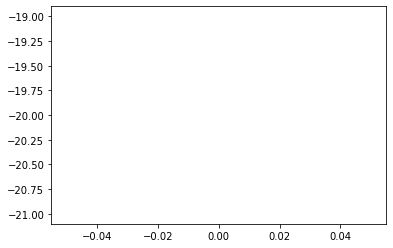

episode: 0   score: -20.0 -20.0   epsilon: 0.009979391231462048 t: 1316
dont dream: not fit
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward 1.0
reward 1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


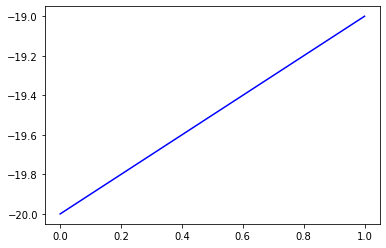

episode: 1   score: -19.0 -19.5   epsilon: 0.009979391231462048 t: 2905
dont dream: not fit
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward 1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


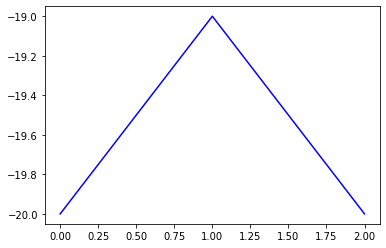

episode: 2   score: -20.0 -19.666666666666668   epsilon: 0.009979391231462048 t: 4235
dont dream: not fit
reward -1.0
reward -1.0
reward -1.0
reward 1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward 1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


In [ ]:
stop_train = False
for e in range(EPISODES):
    done = False
    score = 0

    state = env.reset()
    state = state/255.
    while not done:
        t += 1
        # get action for the current state and go one step in environment
        act_verbose = np.random.rand()<0
        action = agent.get_action(state,act_verbose)
        
        next_state, reward, done, info = env.step(action)
        if reward!=0:
            print('reward',reward,flush=True)
        
        next_state = next_state
        frames.append(next_state)
        
        agent.append_sample(state, action, reward, next_state, done)

        agent.train_model()
        score += reward
        state = next_state

        if done:
            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            plt.plot(episodes, scores, 'b')
            plt.show()
            #pylab.savefig("./save_graph/aa_gun_dqn.png")

            print("episode:", e, "  score:", score,np.mean(scores), "  epsilon:", sarsa.epsilon, 't:', t,flush=True)
            agent.update_target_model()

In [ ]:
agent.update_target_model()

In [ ]:
reward = np.array(sarsa.r)

In [ ]:
#pong
#у рандома -20.09 (не верю, повторить) -20.34 -20.30
#sarsa
#Model based 
#Dreamer 
#Dreamer sarsa: 
#Dreamer sarsa filtered:
#Dreamer rnd: -20.18


In [ ]:
#сохранить последний раунд
from PIL import Image
d_sz = len(sarsa.done)
d_where=np.where(sarsa.done)[0]
inverced_index=d_where-d_sz
print(inverced_index)

imgs = [Image.fromarray(frames[i]) for i in range(inverced_index[-2]+1,inverced_index[-1])]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs[0].save("pong_dreamer_light.gif", save_all=True, append_images=imgs[1:], duration=1/20, loop=0)

In [ ]:
#сохранить вообще всё
from PIL import Image
imgs = [Image.fromarray(frames[i]) for i in range(0,len(frames))]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs[0].save("pong.gif", save_all=True, append_images=imgs[1:], duration=1/20, loop=0)